<a href="https://colab.research.google.com/github/Trieu1020/baitapAI1/blob/main/AI9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 9.0 MB/s eta 0:00:00


CookingTime: 14.383507706153674
PowerLevel: 85.99999999999999


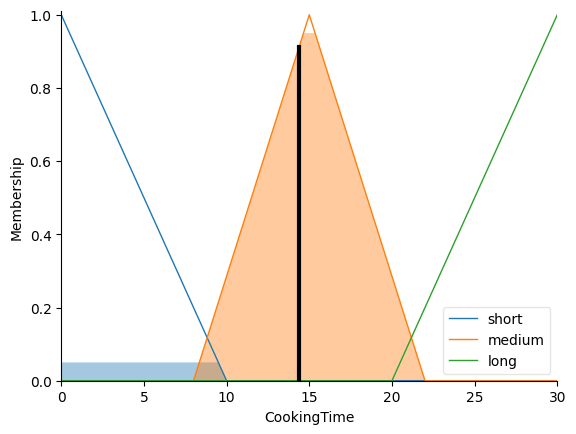

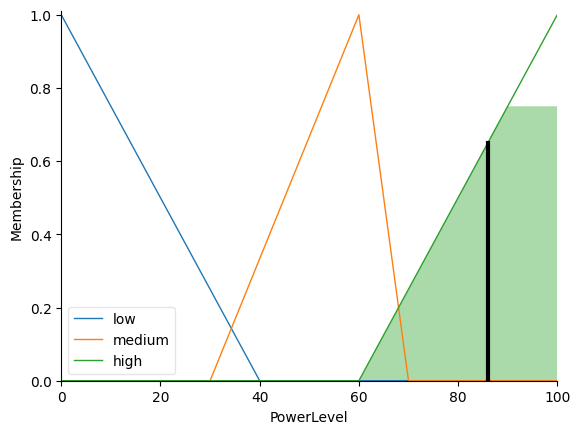

In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

FoodWeight = ctrl.Antecedent(np.arange(0, 1001, 1), 'FoodWeight')
FoodType = ctrl.Antecedent(np.arange(0, 11, 1), 'FoodType')
FoodTemperature = ctrl.Antecedent(np.arange(0, 61, 1), 'FoodTemperature')

CookingTime = ctrl.Consequent(np.arange(0, 31, 1), 'CookingTime')
PowerLevel = ctrl.Consequent(np.arange(0, 101, 1), 'PowerLevel')

FoodWeight['light'] = fuzz.trimf(FoodWeight.universe, [0, 0, 300])
FoodWeight['medium'] = fuzz.trimf(FoodWeight.universe, [200, 500, 700])
FoodWeight['heavy'] = fuzz.trimf(FoodWeight.universe, [600, 1000, 1000])

FoodType['soft'] = fuzz.trimf(FoodType.universe, [0, 0, 3])
FoodType['medium'] = fuzz.trimf(FoodType.universe, [2, 5, 7])
FoodType['hard'] = fuzz.trimf(FoodType.universe, [6, 10, 10])

FoodTemperature['cold'] = fuzz.trimf(FoodTemperature.universe, [0, 0, 10])
FoodTemperature['warm'] = fuzz.trimf(FoodTemperature.universe, [20, 25, 35])
FoodTemperature['hot'] = fuzz.trimf(FoodTemperature.universe, [30, 50, 60])

CookingTime['short'] = fuzz.trimf(CookingTime.universe, [0, 0, 10])
CookingTime['medium'] = fuzz.trimf(CookingTime.universe, [8, 15, 22])
CookingTime['long'] = fuzz.trimf(CookingTime.universe, [20, 30, 30])

PowerLevel['low'] = fuzz.trimf(PowerLevel.universe, [0, 0, 40])
PowerLevel['medium'] = fuzz.trimf(PowerLevel.universe, [30, 60, 70])
PowerLevel['high'] = fuzz.trimf(PowerLevel.universe, [60, 100, 100])

rules = [
    ctrl.Rule(FoodWeight['light'], CookingTime['short']),
    ctrl.Rule(FoodWeight['medium'], CookingTime['medium']),
    ctrl.Rule(FoodWeight['heavy'], CookingTime['long']),
    ctrl.Rule(FoodType['soft'], PowerLevel['low']),
    ctrl.Rule(FoodType['medium'], PowerLevel['medium']),
    ctrl.Rule(FoodType['hard'], PowerLevel['high']),
    ctrl.Rule(FoodTemperature['cold'], CookingTime['long']),
    ctrl.Rule(FoodTemperature['warm'], CookingTime['medium']),
    ctrl.Rule(FoodTemperature['hot'], CookingTime['short']),
    ctrl.Rule(FoodWeight['heavy'] & FoodType['hard'] & FoodTemperature['cold'], CookingTime['long']),
    ctrl.Rule(FoodWeight['heavy'] & FoodType['hard'] & FoodTemperature['cold'], PowerLevel['high']),
    ctrl.Rule(FoodWeight['medium'] & FoodType['soft'] & FoodTemperature['warm'], CookingTime['medium']),
    ctrl.Rule(FoodWeight['medium'] & FoodType['soft'] & FoodTemperature['warm'], PowerLevel['low']),
    ctrl.Rule(FoodWeight['light'] & FoodType['medium'] & FoodTemperature['hot'], CookingTime['short']),
    ctrl.Rule(FoodWeight['light'] & FoodType['medium'] & FoodTemperature['hot'], PowerLevel['medium']),
]

control_sys = ctrl.ControlSystem(rules)
MW_sys = ctrl.ControlSystemSimulation(control_sys)

MW_sys.input['FoodWeight'] = 510
MW_sys.input['FoodType'] = 9
MW_sys.input['FoodTemperature'] = 31

MW_sys.compute()

print('CookingTime:', MW_sys.output['CookingTime'])
print('PowerLevel:', MW_sys.output['PowerLevel'])
CookingTime.view(sim=MW_sys)
PowerLevel.view(sim=MW_sys)